<a href="https://colab.research.google.com/github/NWOM/ARBITARY-PREDICTION/blob/main/sagnik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px #for data visualization
import plotly.graph_objects as go 
import plotly.io as pio
pio.templates 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
input_data=pd.read_csv('/content/dataframe_.csv')

In [29]:
input_data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [5]:
input_data.shape

(1698, 2)

In [30]:
input_data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [10]:
print(input_data.info)

<bound method DataFrame.info of                  0             1
0            input        output
1     -122.7406674  -130.5720846
2     -121.5314194  -129.9389289
3      -134.917019  -130.1418321
4     -120.6059511  -125.7609321
...            ...           ...
1693   25.41018353  -76.38090212
1694   29.53730396  -82.79693428
1695    31.6333313           -87
1696   29.09145773  -104.9430524
1697   17.14529595  -101.7268941

[1698 rows x 2 columns]>


In [11]:
input_data.isnull().sum()

0    1
1    1
dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
input_data['input'].fillna(input_data['input'].mean(),inplace=True)

In [36]:
scaler=MinMaxScaler()
input_data['input']=scaler.fit_transform(input_data['input'].values.reshape(-1,1))


In [45]:
input_data['input_square']=input_data['input']**2

In [53]:
from sklearn.model_selection import train_test_split,GridSearchCV
X=input_data[['input','input_square']].values
y=input_data['output'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [51]:
param_grid={'fit_intercept':[True,False],'normalize':[True,False]}

In [55]:

from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
grid_search=GridSearchCV(reg_model,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [56]:
best_params=grid_search.best_params_
reg_model=LinearRegression(**best_params)
reg_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

Text(0.5, 1.0, 'input vs output')

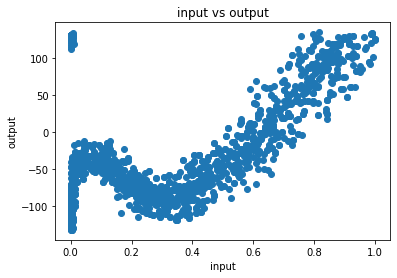

In [58]:
#visualize the data 
fig,ax=plt.subplots()
ax.scatter(input_data['input'],input_data['output'])
ax.set_xlabel('input')
ax.set_ylabel('output')
ax.set_title('input vs output')

In [57]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=reg_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)

1902.5200413397233


In [59]:
r2=r2_score(y_test,y_pred)
print(r2)

0.5912255628577057


In [60]:
print(best_params)

{'fit_intercept': True, 'normalize': True}


Text(0.5, 1.0, 'Model Predictions')

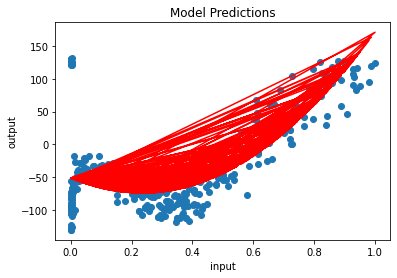

In [61]:
#visualize the model prediction
fig,ax=plt.subplots()
ax.scatter(X_test[:,0],y_test)
ax.plot(X_test[:,0],y_pred,color='red')
ax.set_xlabel('input')
ax.set_ylabel('output')
ax.set_title('Model Predictions')

In [62]:
new_input_data=[[10.09]]
new_input_square=new_input_data[0][0]**2

new_output_data=reg_model.predict([[new_input_data[0][0],new_input_square]] )
plt.show()